In [24]:
!pip install lightgbm xgboost

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 3.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 5.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [26]:

df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')


In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# Data distributions
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Histograms of Age and Fare')

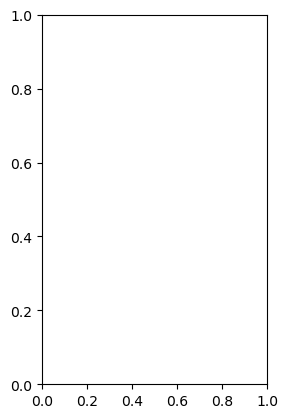

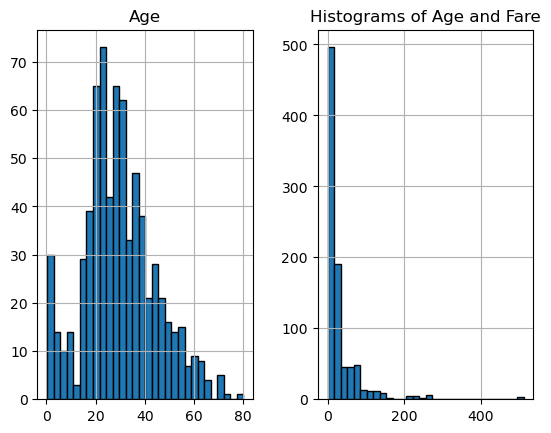

In [30]:
# Histograms
plt.subplot(1, 2, 1)
df_train[['Age', 'Fare']].hist(bins=30, edgecolor='black')
plt.title('Histograms of Age and Fare')


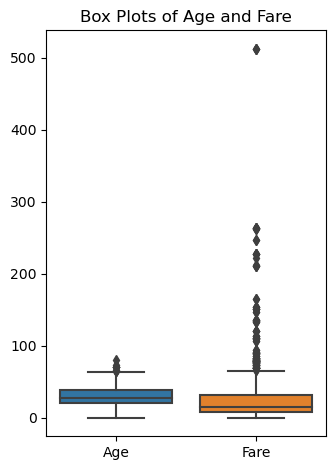

In [31]:
# Box plots
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train[['Age', 'Fare']])
plt.title('Box Plots of Age and Fare')

plt.tight_layout()
plt.show()

In [32]:
# Visualize relationships
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Age vs Fare')

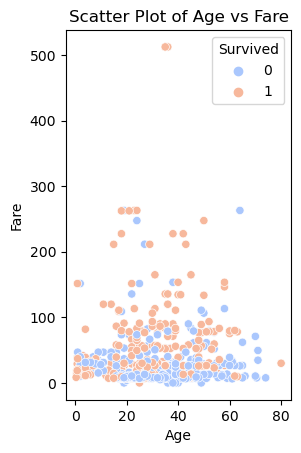

In [33]:
# Scatter plot of Age vs Fare
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train, palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare')

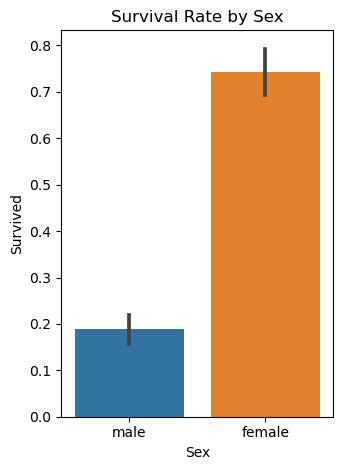

In [34]:
# Bar plot of survival rate by Sex
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Survival Rate by Sex')

plt.tight_layout()
plt.show()

## 3: Data Preprocessing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
# Define features and target
X = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_train['Survived']


In [37]:
# Impute missing values and encode categorical variables
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

In [38]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [39]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [40]:
# Preprocess the data
X_processed = preprocessor.fit_transform(X)

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## 4: Building Predictive Models

In [42]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [43]:
# Define and train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [44]:
# Define and train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [45]:
# Evaluate models
def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

lgb_metrics = evaluate_model(lgb_pred, y_test)
xgb_metrics = evaluate_model(xgb_pred, y_test)

In [46]:
print("LightGBM Metrics:")
print(f"Accuracy: {lgb_metrics[0]}")
print(f"Precision: {lgb_metrics[1]}")
print(f"Recall: {lgb_metrics[2]}")
print(f"F1 Score: {lgb_metrics[3]}")

LightGBM Metrics:
Accuracy: 0.8435754189944135
Precision: 0.8194444444444444
Recall: 0.7972972972972973
F1 Score: 0.8082191780821918


In [47]:
print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_metrics[0]}")
print(f"Precision: {xgb_metrics[1]}")
print(f"Recall: {xgb_metrics[2]}")
print(f"F1 Score: {xgb_metrics[3]}")


XGBoost Metrics:
Accuracy: 0.8044692737430168
Precision: 0.7671232876712328
Recall: 0.7567567567567568
F1 Score: 0.7619047619047619


##  5: Comparative Analysis

In [48]:
# Visualization of model performance
models = ['LightGBM', 'XGBoost']
accuracies = [lgb_metrics[0], xgb_metrics[0]]
precisions = [lgb_metrics[1], xgb_metrics[1]]
recalls = [lgb_metrics[2], xgb_metrics[2]]
f1_scores = [lgb_metrics[3], xgb_metrics[3]]

x = range(len(models))

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Comparison')

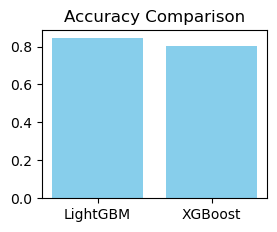

In [49]:
plt.subplot(2, 2, 1)
plt.bar(x, accuracies, tick_label=models, color='skyblue')
plt.title('Accuracy Comparison')


Text(0.5, 1.0, 'Precision Comparison')

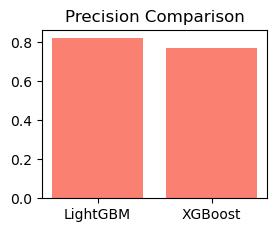

In [50]:
plt.subplot(2, 2, 2)
plt.bar(x, precisions, tick_label=models, color='salmon')
plt.title('Precision Comparison')

Text(0.5, 1.0, 'Recall Comparison')

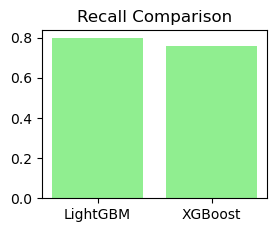

In [51]:
plt.subplot(2, 2, 3)
plt.bar(x, recalls, tick_label=models, color='lightgreen')
plt.title('Recall Comparison')

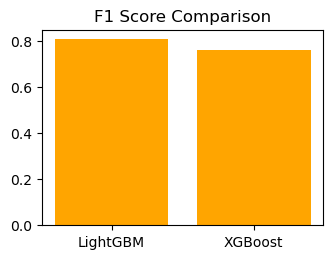

In [52]:
plt.subplot(2, 2, 4)
plt.bar(x, f1_scores, tick_label=models, color='orange')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()